In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('../')
print(os.getcwd())

from utils import weather_api_calls

In [ ]:
def create_nan(data, prob = 0.8):
    nan_data = data.copy()
    for column in nan_data.columns[1:]:
        for index, _ in nan_data.iterrows():
            if np.random.rand() < prob:
                nan_data.at[index, column] = np.nan
    return nan_data
    

In [ ]:
hourly_dataframe=weather_api_calls.get_weather()
x = create_nan(hourly_dataframe)

<Axes: xlabel='date'>

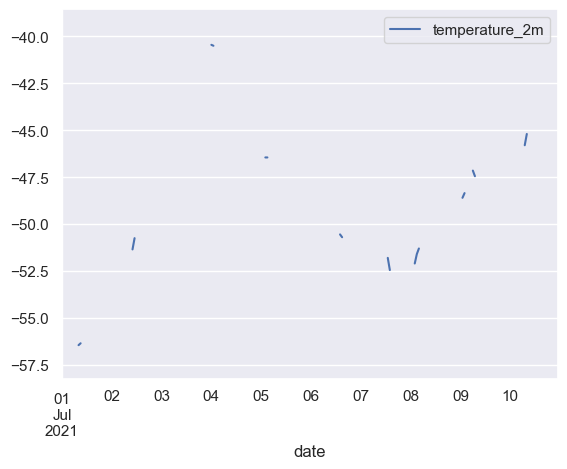

In [ ]:
x.plot(x="date", y="temperature_2m")

In [ ]:
def fill_nans_mean(data):
    filled_data = data.copy()
    for column in filled_data.columns[1:]:
        nan_indices = filled_data[column].index[filled_data[column].apply(np.isnan)]
        for index in nan_indices:
            prev_index = filled_data[column].index[filled_data[column].apply(lambda x: not np.isnan(x)) & (filled_data[column].index <= index)].max()
            next_index = filled_data[column].index[filled_data[column].apply(lambda x: not np.isnan(x)) & (filled_data[column].index >= index)].min()
            if np.isnan(prev_index):
                prev_index = filled_data[column].first_valid_index()
                filled_data.loc[index, column] = filled_data.loc[prev_index, column]
            if np.isnan(next_index):
                next_index = filled_data[column].last_valid_index()
                filled_data.loc[index, column] = filled_data.loc[prev_index, column]

            mean_value = (filled_data.at[prev_index, column] + filled_data.at[next_index, column]) / 2

            filled_data.loc[prev_index+1:next_index-1, column] = mean_value
            
    return filled_data


In [ ]:
y = fill_nans_mean(x)


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,  10,  11,
            ...
            229, 230, 232, 233, 234, 235, 236, 237, 238, 239],
           dtype='int64', length=194)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            230, 231, 232, 233, 234, 235, 236, 237, 238, 239],
           dtype='int64', length=200)
Int64Index([  0,   2,   5,   7,  10,  11,  12,  13,  14,  15,
            ...
            228, 229, 230, 231, 232, 233, 234, 235, 236, 238],
           dtype='int64', length=193)
Int64Index([  0,   1,   4,   7,   9,  10,  11,  12,  13,  14,
            ...
            228, 229, 230, 231, 232, 233, 236, 237, 238, 239],
           dtype='int64', length=197)
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            227, 228, 229, 230, 232, 234, 235, 236, 238, 239],
           dtype='int64', length=195)


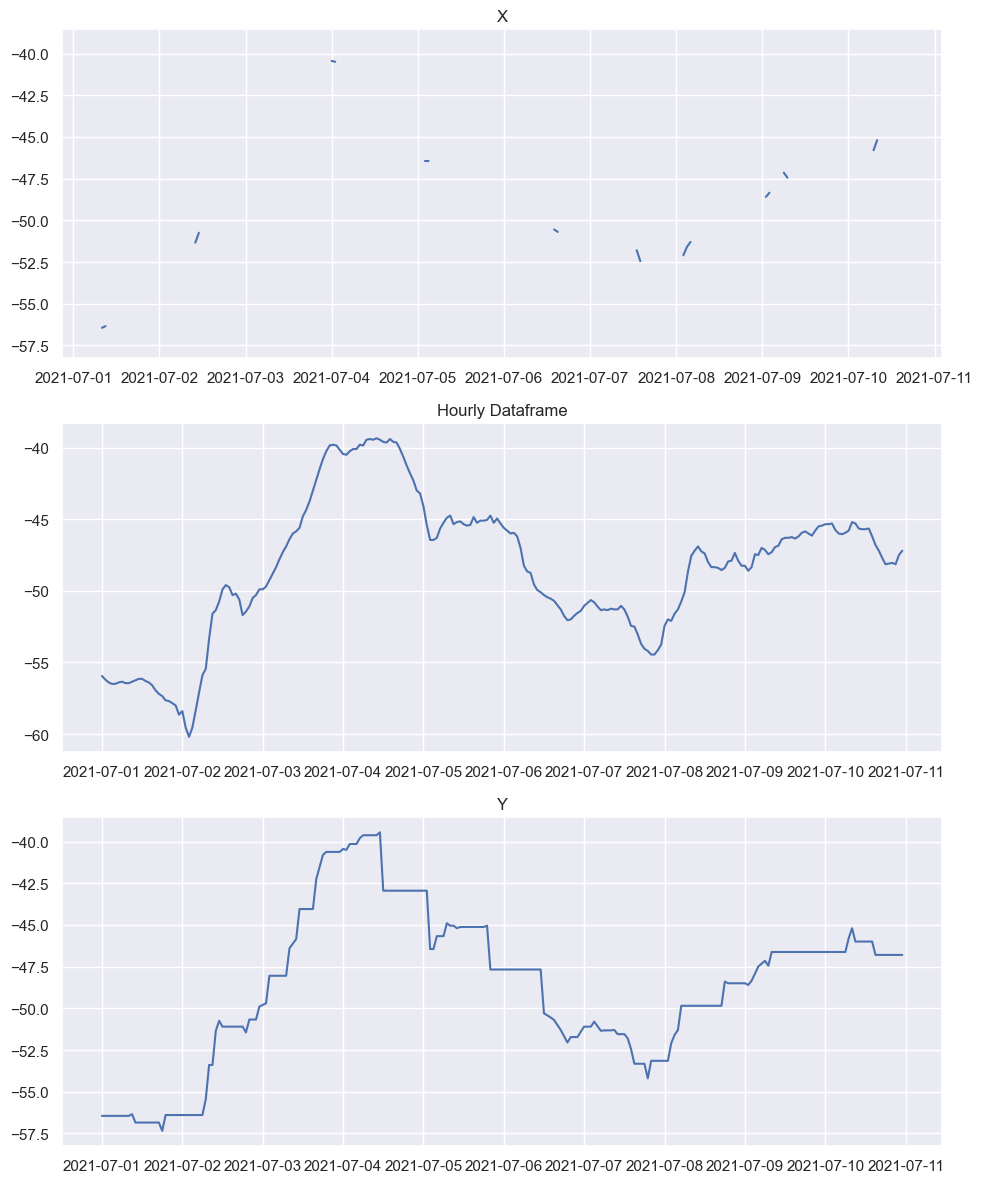

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# График исходных данных
axes[1].plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"])
axes[1].set_title("Hourly Dataframe")

# График с пропусками
axes[0].plot(x["date"], x["temperature_2m"])
axes[0].set_title("X")

# График заполненных данных
axes[2].plot(y["date"], y["temperature_2m"])
axes[2].set_title("Y")

plt.tight_layout()
plt.show()



In [ ]:
print(x.to_string())

                         date  temperature_2m  relative_humidity_2m  surface_pressure  wind_speed_10m  hourly_wind_direction_10m
0   2021-07-01 00:00:00+00:00             NaN                   NaN               NaN             NaN                 206.211319
1   2021-07-01 01:00:00+00:00             NaN                   NaN        624.546509             NaN                        NaN
2   2021-07-01 02:00:00+00:00             NaN                   NaN               NaN       25.762016                        NaN
3   2021-07-01 03:00:00+00:00             NaN                   NaN        624.772888       26.758923                        NaN
4   2021-07-01 04:00:00+00:00             NaN                   NaN        624.834961             NaN                        NaN
5   2021-07-01 05:00:00+00:00             NaN                   NaN               NaN       26.434887                        NaN
6   2021-07-01 06:00:00+00:00             NaN                   NaN        625.156494       25.00

In [ ]:
print(y.to_string())

                         date  temperature_2m  relative_humidity_2m  surface_pressure  wind_speed_10m  hourly_wind_direction_10m
0   2021-07-01 00:00:00+00:00      -56.443501             66.422562        624.546509       25.762016                 206.211319
1   2021-07-01 01:00:00+00:00      -56.443501             66.422562        624.546509       25.762016                 209.497803
2   2021-07-01 02:00:00+00:00      -56.443501             66.422562        624.659668       25.762016                 209.497803
3   2021-07-01 03:00:00+00:00      -56.443501             66.422562        624.772888       26.758923                 209.497803
4   2021-07-01 04:00:00+00:00      -56.443501             66.422562        624.834961       26.596905                 209.497803
5   2021-07-01 05:00:00+00:00      -56.443501             66.422562        624.995728       26.434887                 209.497803
6   2021-07-01 06:00:00+00:00      -56.443501             66.422562        625.156494       25.00

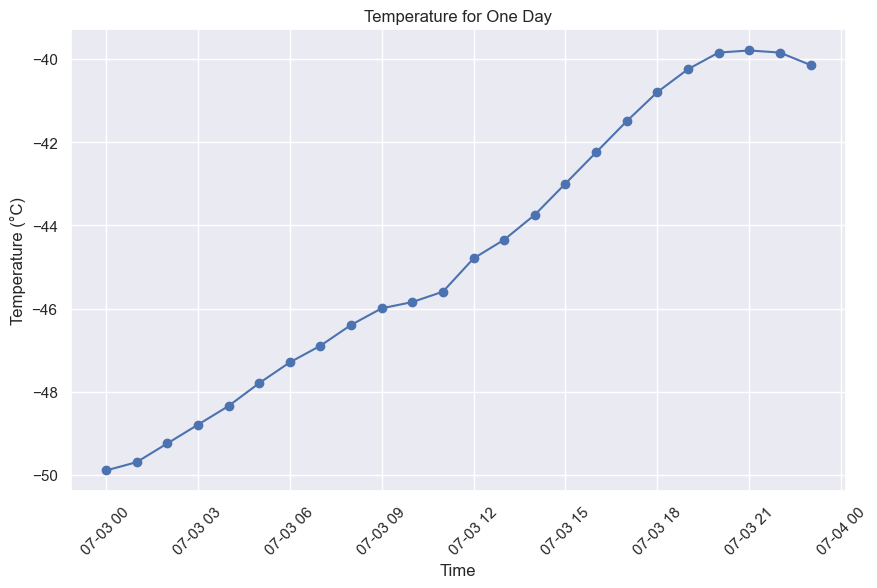

In [ ]:
start_date = '2021-07-03 00:00:00'
end_date = '2021-07-03 23:59:59'

one_day_data = hourly_dataframe[(hourly_dataframe['date'] >= start_date) & (hourly_dataframe['date'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(one_day_data["date"], one_day_data["temperature_2m"], marker='o', linestyle='-')

plt.title("Temperature for One Day")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

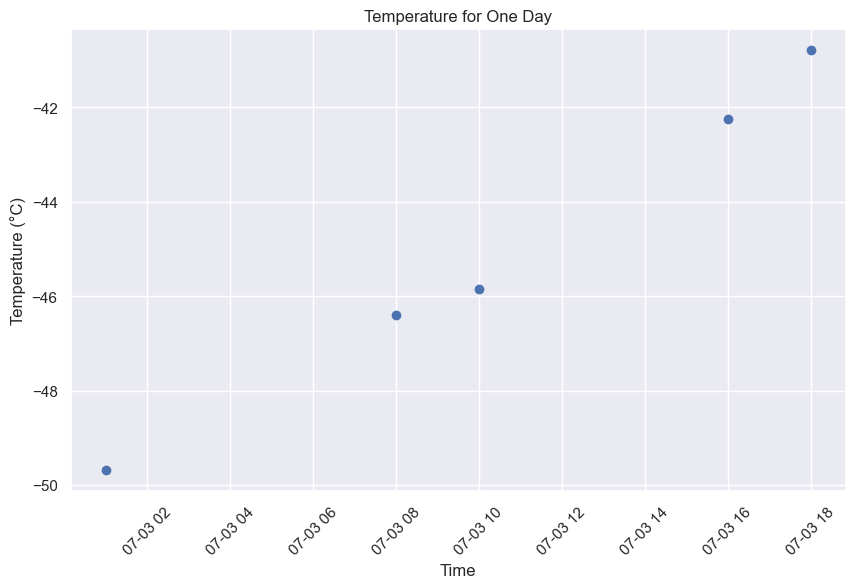

In [ ]:
start_date = '2021-07-03 00:00:00'
end_date = '2021-07-03 23:59:59'

one_day_data = x[(x['date'] >= start_date) & (x['date'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(one_day_data["date"], one_day_data["temperature_2m"], marker='o', linestyle='-')

plt.title("Temperature for One Day")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

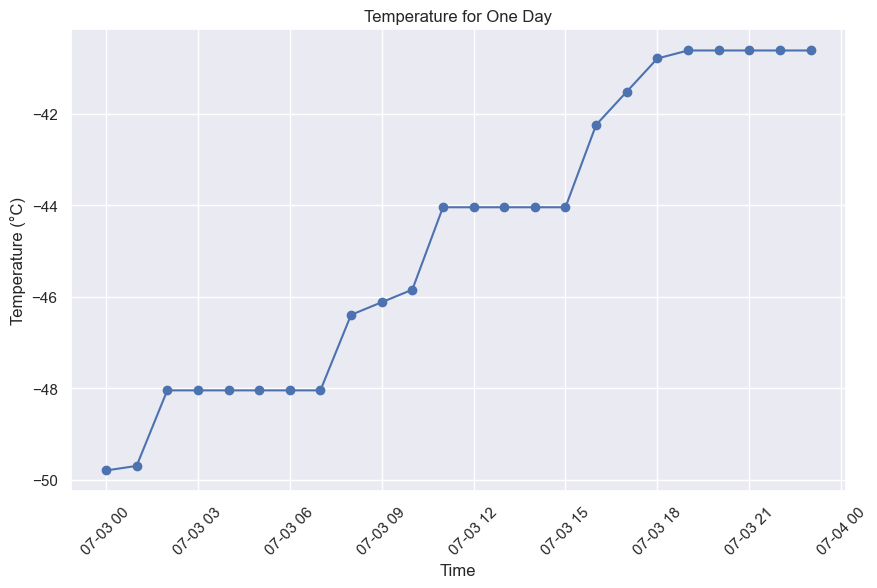

In [ ]:
start_date = '2021-07-03 00:00:00'
end_date = '2021-07-03 23:59:59'

one_day_data = y[(y['date'] >= start_date) & (y['date'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(one_day_data["date"], one_day_data["temperature_2m"], marker='o', linestyle='-')

plt.title("Temperature for One Day")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()